In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
column_names = [ 'SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']

In [4]:
# pd.read_csv function is used to read a file
data = pd.read_csv('./dataset/iris.data', names = column_names)

In [5]:
# outputs the first 5 rows
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
# outputs the last 5 rows
data.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
# checking if there is any inconsistency in the dataset
# outputs what is contained in the dataset and there data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.shape

(150, 5)

In [10]:
data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [11]:
# checking whether their are missing values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

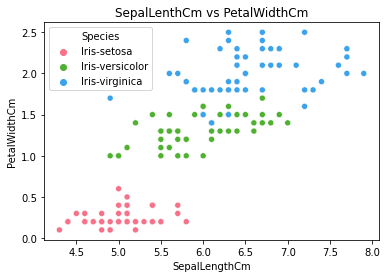

In [12]:
sns.scatterplot(data = data, x = 'SepalLengthCm', y= 'PetalWidthCm', hue =data.Species, palette = 'husl')
plt.title('SepalLenthCm vs PetalWidthCm')
plt.show()

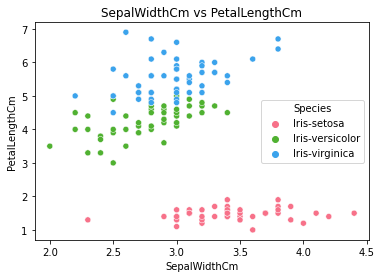

In [13]:
sns.scatterplot(data = data, x = 'SepalWidthCm', y= 'PetalLengthCm', hue =data.Species, palette = 'husl')
plt.title('SepalWidthCm vs PetalLengthCm')
plt.show()

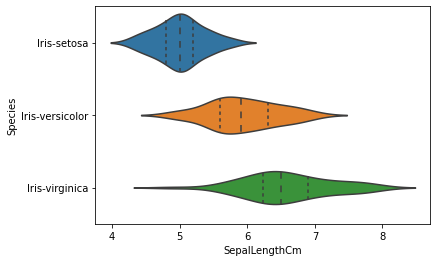

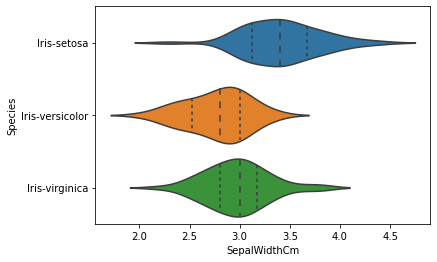

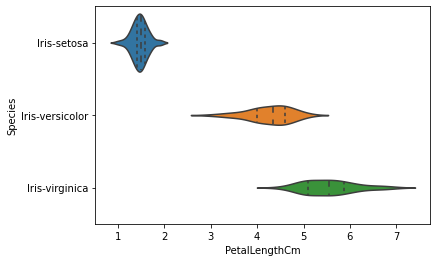

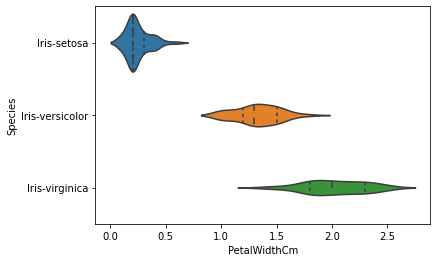

In [14]:
# Now let us see how the length and width vary according to the species

sns.violinplot(y='Species', x='SepalLengthCm', data=data, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='SepalWidthCm', data=data, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalLengthCm', data=data, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalWidthCm', data=data, inner='quartile')
plt.show()

In [15]:
#dropping the Species column as it is unecessary, axis=1 specifies that it should be column wise, inplace =1 means the changes should be reflected into the dataframe
features = data.drop('Species', axis = 1)

In [16]:
features.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [17]:
label = data['Species']

In [18]:
label.head(2)

0    Iris-setosa
1    Iris-setosa
Name: Species, dtype: object

### **Implementing the ml algorithm**

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [20]:
X_train,y_train,X_test,y_test = train_test_split(features, label, test_size = 0.2, random_state = 30)

In [21]:
model = DecisionTreeClassifier()

In [22]:
model.fit(features, label)

DecisionTreeClassifier()

In [23]:
f"The percentage of our score metrics is :{model.score(features, label)* 100} % "

'The percentage of our score metrics is :100.0 % '

In [24]:
model.predict([[4.5, 2.7, 1.2, 0.5]])

array(['Iris-setosa'], dtype=object)

In [25]:
model.predict([[5.6, 2.6, 4.6, 1.6]])

array(['Iris-versicolor'], dtype=object)